水果图片分类

包含1036张水果图片，共5个类别（苹果288张、香蕉275张、葡萄
216张、橙子276张、梨251张）

In [135]:
# !cp /content/drive/MyDrive/DL/data_test/fruits.zip ./

In [136]:
# !unzip -qq fruits.zip

In [137]:
# import os

# for root, dirs, files in os.walk('fruits'):
#     for file in files:
#         # 获取子文件夹名
#         subdir_name = os.path.basename(root)
#         # 构造新的文件名
#         new_file_name = f"{subdir_name}.{file}"
#         # 获取文件的原始完整路径
#         old_file_path = os.path.join(root, file)
#         # 获取新的文件完整路径
#         new_file_path = os.path.join(root, new_file_name)
#         # 重命名文件
#         os.rename(old_file_path, new_file_path)

In [138]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [139]:
base_dir = 'fruits'

# data preprocessing
from tensorflow.keras.utils import image_dataset_from_directory

train_ds, validation_ds = image_dataset_from_directory(base_dir, label_mode='categorical',validation_split=0.2,subset="both",batch_size=32,image_size=(180, 180),seed=42)

Found 1306 files belonging to 5 classes.
Using 1045 files for training.
Using 261 files for validation.


In [140]:
train_ds.class_names

['apple', 'banana', 'grape', 'orange', 'pear']

In [141]:
validation_ds.class_names

['apple', 'banana', 'grape', 'orange', 'pear']

In [142]:
# 计算validation_ds的大小
num_validation_samples = tf.data.experimental.cardinality(validation_ds).numpy()

In [143]:
num_validation_samples

9

In [144]:
# 定义我们想要用于验证的样本数量，剩下的将用于测试
num_val_samples = int(num_validation_samples * 0.5)

In [145]:
num_val_samples

4

In [146]:
val_ds = validation_ds.take(num_val_samples)

In [147]:
test_ds = validation_ds.skip(num_val_samples)

In [148]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [149]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

In [150]:
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [151]:
# frozen weight
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [152]:
from keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
# x = layers.Rescaling(1./255)(x)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
# x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [153]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_1  (None, 180, 180, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 180, 180, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_5 (Flatten)         (None, 12800)             0   

In [154]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [155]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fruits_vgg16_with_aug.h5",
        save_best_only=True,
        monitor="val_loss")
]

In [156]:
history = model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=callbacks)

Epoch 1/50
33/33 [==============================] - 5s 121ms/step - loss: 8.9553 - accuracy: 0.8488 - val_loss: 5.7501 - val_accuracy: 0.8516
Epoch 2/50
33/33 [==============================] - 4s 117ms/step - loss: 1.6742 - accuracy: 0.9483 - val_loss: 0.0697 - val_accuracy: 0.9922
Epoch 3/50
33/33 [==============================] - 4s 120ms/step - loss: 1.3791 - accuracy: 0.9522 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
33/33 [==============================] - 4s 111ms/step - loss: 0.8950 - accuracy: 0.9703 - val_loss: 0.1849 - val_accuracy: 0.9844
Epoch 5/50
33/33 [==============================] - 4s 110ms/step - loss: 0.6955 - accuracy: 0.9732 - val_loss: 5.3784e-06 - val_accuracy: 1.0000
Epoch 6/50
33/33 [==============================] - 4s 112ms/step - loss: 0.7686 - accuracy: 0.9675 - val_loss: 1.8626e-09 - val_accuracy: 1.0000
Epoch 7/50
33/33 [==============================] - 4s 107ms/step - loss: 0.5589 - accuracy: 0.9789 - val_loss: 1.3970e-07 - val_accurac

In [157]:
import matplotlib.pyplot as plt


def show_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

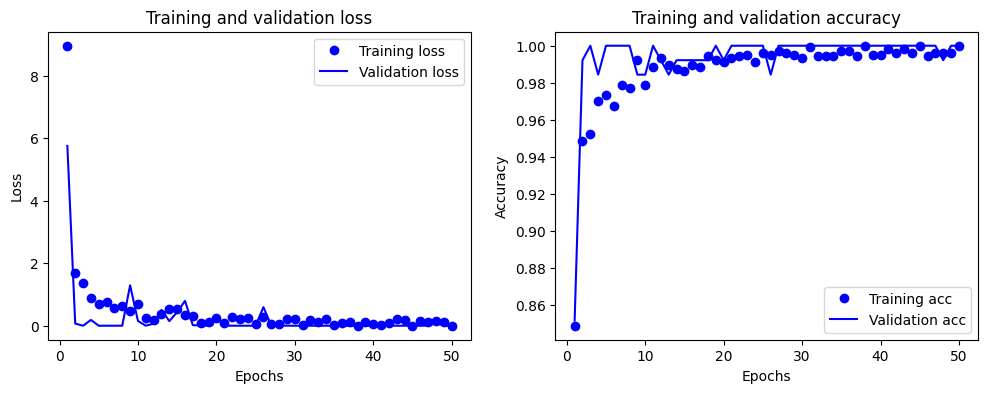

In [158]:
show_history(history)

In [159]:
test_model = keras.models.load_model("fruits_vgg16_with_aug.h5")
test_loss, test_acc = test_model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")

5/5 [==============================] - 2s 430ms/step - loss: 2.4407e-05 - accuracy: 1.0000
Test accuracy: 1.000


In [160]:
from sklearn.metrics import classification_report

# 获取测试集的真实标签
y_true = np.concatenate([y for x, y in test_ds], axis=0)

In [161]:
# 获取预测结果
y_pred = model.predict(test_ds)

5/5 [==============================] - 1s 85ms/step


In [162]:
y_pred = np.argmax(y_pred, axis=1)

In [163]:
y_true = np.argmax(y_true, axis=1)

In [164]:
# 生成分类报告
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        24

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133

